# <center> Bean Quality Assessment: Exploring Correlations in Bean Properties </center>

This project aims to conduct a comprehensive analysis on the bean quality, providing insights to <b>agricultural researchers</b>, <b>farmers</b>, <b>manufacturers</b>, and <b>consumers</b>. Assessing the bean characteristics and their relationships to attain insights contributing to better bean production and informed decisions that foster the advancements across the bean industry. Overall, this project utilizes data-driven insights to optimize innovations for researchers, improve methodologies for assessing bean quality for farmers, develop processing techniques for manufacturers, and promote a healthy and sustainable lifestyle for consumers. 

### Table of Contents
>1. Initial Data Inspection 
>2. Data Cleaning
    - Handling Missing Values
    - Handling Duplicates
    - Handling Outliers
>3. Feature Engineering
    - Normalization (Min-Max Scaling)
>4. Exploratory Data Analysis (EDA)
>5. Conclusion

## Initial Data Inspection

Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


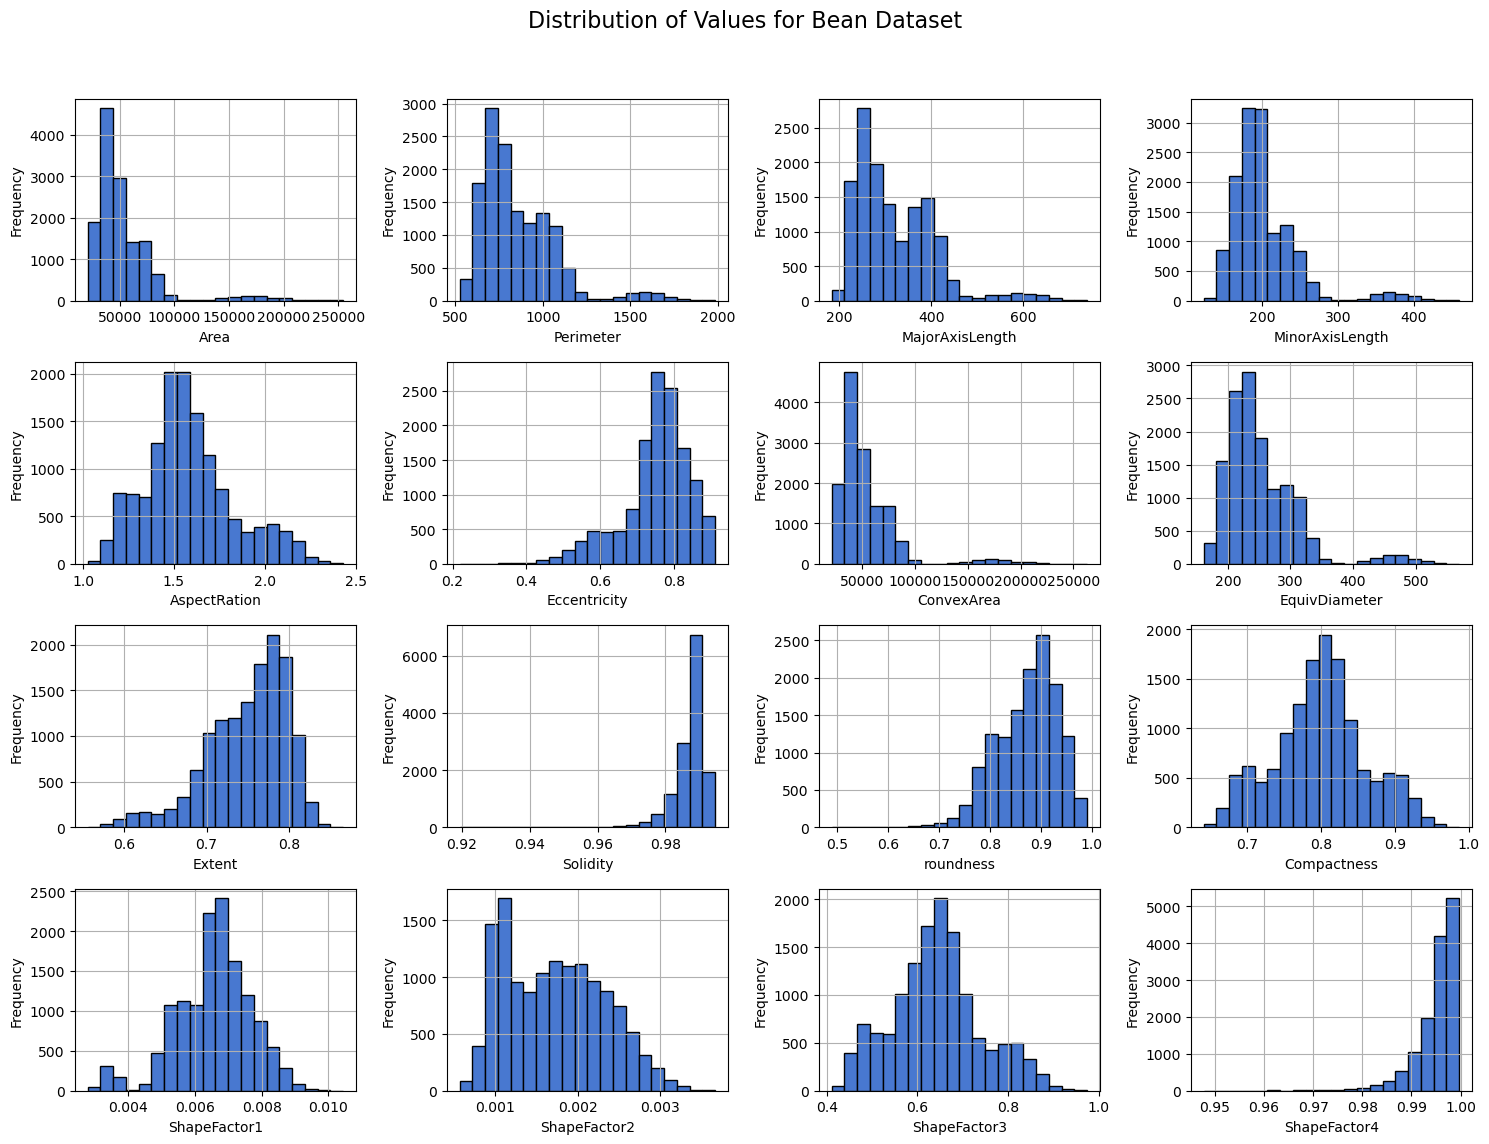

In [7]:
# Select relevant numerical variables from your bean dataset
numerical_vars = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
                  'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 
                  'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Create subplots for each variable
num_plots = len(numerical_vars)
cols = 4  # Number of columns in subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten axes array to iterate over it
axes = axes.flatten()

# Define a single hue color
color = sns.color_palette("muted")[0]

# Iterate over numerical variables and plot histograms with the same color
for i, var in enumerate(numerical_vars):
    ax = axes[i]
    ax.hist(df[var].dropna(), bins=20, color=color, edgecolor='black')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Hide empty subplots
for j in range(num_plots, rows * cols):
    axes[j].axis('off')

# Add a single title to the uppermost subplot
plt.suptitle("Distribution of Values for Bean Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> <b>Insights from the Initial Data Inspection</b>
<ul>
    <li>In terms of the <b>size and shape</b> of the beans, which is determined by features like the Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter, the distribution shows a variety in the the size and shape of the beans.</li>
  <li>In terms of the <b>density</b> of the beans, which is determined by features like Compactness, Solidity, Roundness, Extent, and Shape Factors, the distribution shows moderately stable patterns of the density of the beans.</li>
</ul>

## Data Cleaning

### Handling Missing Values

In [8]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


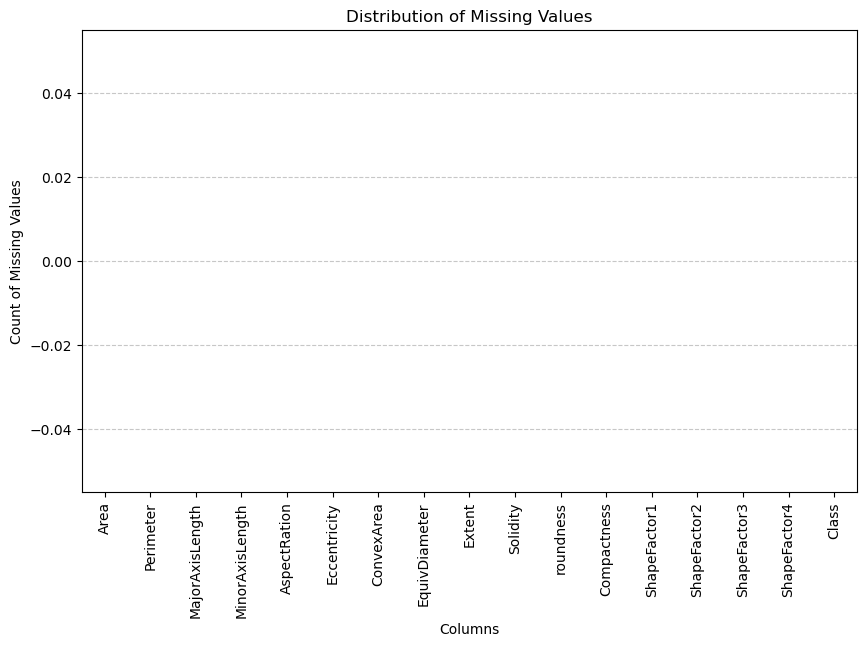

In [9]:
# Calculate the count of missing values for each column
missing_count = df.isnull().sum()

# Create a bar plot to visualize the distribution of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_count.index, y=missing_count.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Distribution of Missing Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Handling Duplicates

In [10]:
#Checking for duplicates in the columns
duplicate_columns = df.columns[df.columns.duplicated()]

# Print duplicate columns, if any
if len(duplicate_columns) > 0:
    print("Duplicate Columns:", duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [11]:
# Check for duplicated values in the dataset
num_duplicated_values = df.duplicated().sum()

# Print the number of duplicated values
print("Number of Duplicated Values:", num_duplicated_values)

Number of Duplicated Values: 68


In [12]:
# Drop duplicate values from the dataset
df.drop_duplicates(inplace=True)
# Print a message to confirm duplicates have been dropped
print("Duplicated values have been dropped.")

Duplicated values have been dropped.


In [13]:
#Double checking the duplicates
df.duplicated().sum()

0

### Handling Outliers

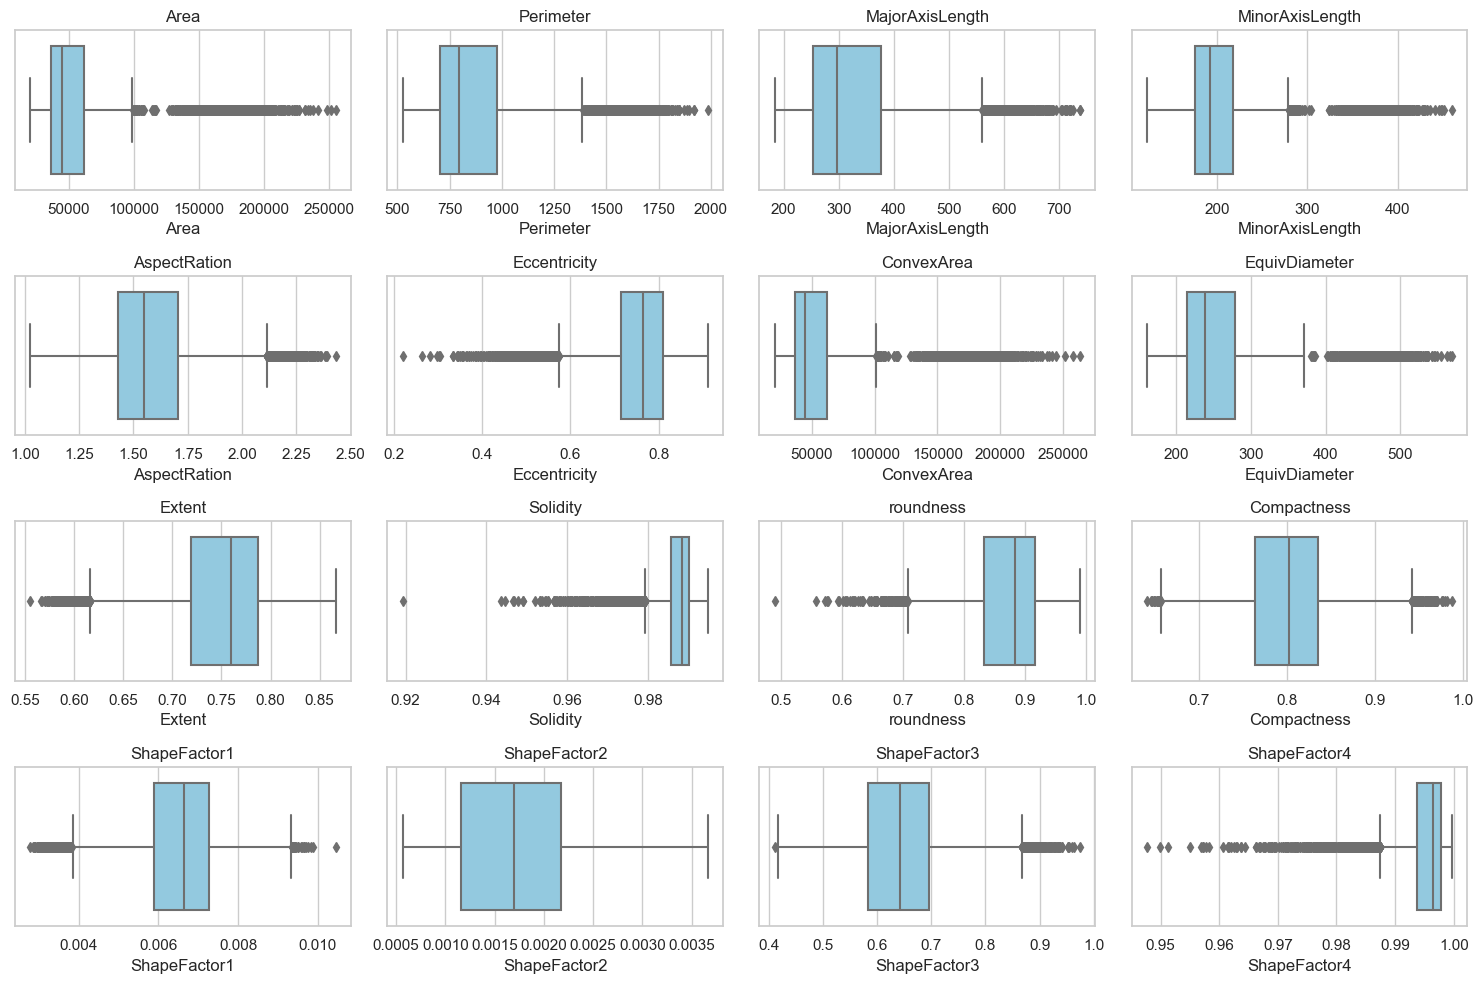

In [14]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical columns for visualization
numerical_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                  'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
                  'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [15]:
# Define a function to remove outliers using trimming method
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)
    return df

# Remove outliers from numerical columns
numerical_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                  'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
                  'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

df_cleaned = remove_outliers(df, numerical_cols)

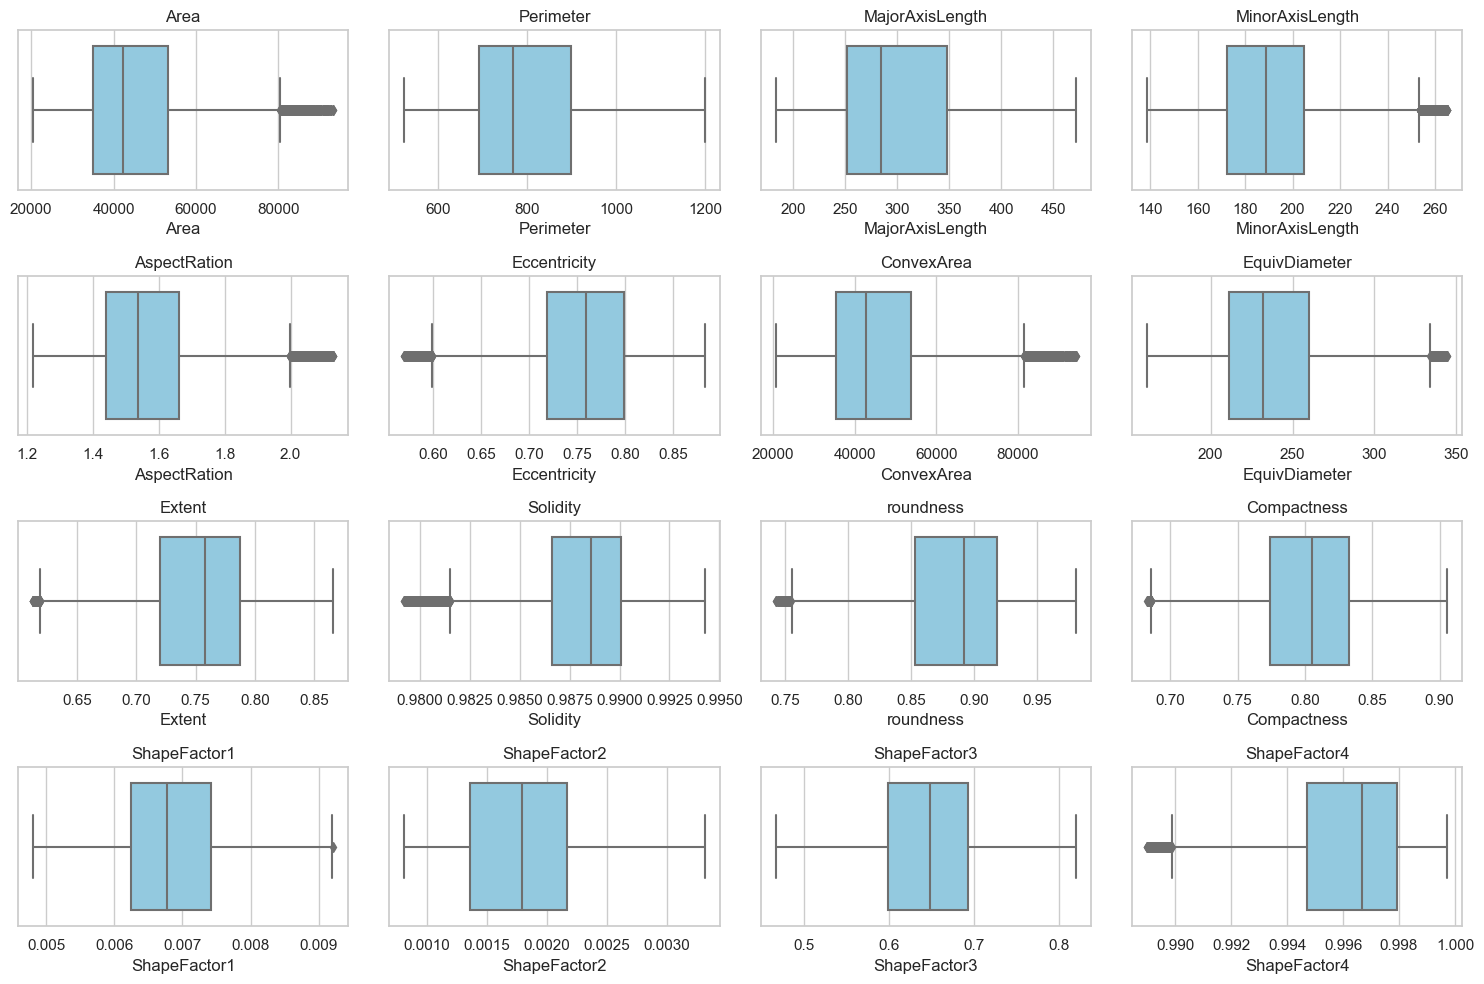

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots for each numerical column after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

## Feature Engineering

<b>Normalization</b> is the feature engineering technique used to rescale the values of the dataset’s numerical features in a certain range. It ensures that all the features contribute equally to the analysis.

<b>Min-Max Scaling</b> is the Normalization technique applied to ensure that the beans’ numerical features were only in the range of 0 to 1. Positive scaled values are easier to interpret as they show consistency in the correlation of features, facilitating more accurate assessments of bean quality.

In [1]:
# Selecting only numerical columns
numerical_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
                  'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 
                  'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 
                  'ShapeFactor3', 'ShapeFactor4']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

NameError: name 'MinMaxScaler' is not defined

In [18]:
df_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.153913,0.195707,0.159891,0.291105,0.100442,0.239951,0.154376,0.215130,0.588120,0.534902,0.752652,0.855548,0.557184,0.718651,0.838191,0.940198
1,0.154434,0.196774,0.184276,0.257141,0.181496,0.385395,0.153887,0.215786,0.505692,0.687736,0.748818,0.741503,0.605662,0.629361,0.714583,0.554209
2,0.156300,0.174028,0.140009,0.333811,0.022830,0.062090,0.154471,0.218134,0.635689,0.881681,0.953178,0.966828,0.507196,0.807230,0.962323,0.979751
3,0.156465,0.204339,0.136154,0.341532,0.008837,0.024658,0.157488,0.218341,0.639519,0.452283,0.707294,0.987683,0.498652,0.824724,0.985974,0.976511
4,0.156657,0.195251,0.143226,0.330037,0.032058,0.085762,0.156999,0.218583,0.680552,0.554416,0.780765,0.951853,0.512512,0.794167,0.945417,0.917059


In [19]:
df_scaled.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
10256,0.297438,0.348424,0.364451,0.373523,0.367725,0.623043,0.296550,0.383124,0.401662,0.738678,0.730654,0.533662,0.465698,0.373855,0.498710,0.874409
10257,0.297493,0.345166,0.339679,0.411187,0.284110,0.529357,0.296360,0.383184,0.738552,0.766644,0.753379,0.625032,0.426984,0.428635,0.592117,0.858880
10258,0.298015,0.347868,0.339553,0.414938,0.279882,0.524122,0.297379,0.383754,0.462270,0.709909,0.738300,0.627172,0.425417,0.429611,0.594333,0.723584
10259,0.298124,0.354479,0.345941,0.407732,0.298235,0.546472,0.298710,0.383874,0.365415,0.571135,0.694139,0.603543,0.435064,0.415090,0.569938,0.579577
10260,0.298289,0.367021,0.386713,0.343981,0.441283,0.692398,0.297800,0.384053,0.695219,0.693221,0.612153,0.458063,0.498015,0.330076,0.423199,0.855241


In [20]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10261.0,0.352300,0.209444,0.0,0.200250,0.300073,0.449608,1.0
Perimeter,10261.0,0.412597,0.216833,0.0,0.248752,0.362909,0.554824,1.0
MajorAxisLength,10261.0,0.405898,0.209928,0.0,0.237942,0.351345,0.569120,1.0
MinorAxisLength,10261.0,0.419750,0.216330,0.0,0.264497,0.395309,0.521479,1.0
AspectRation,10261.0,0.381390,0.219939,0.0,0.242933,0.350725,0.487842,1.0
Eccentricity,10261.0,0.586179,0.223548,0.0,0.476015,0.605399,0.731178,1.0
ConvexArea,10261.0,0.352978,0.210532,0.0,0.200168,0.300056,0.450668,1.0
EquivDiameter,10261.0,0.424851,0.210349,0.0,0.272049,0.386000,0.539676,1.0
Extent,10261.0,0.548706,0.174184,0.0,0.422256,0.573462,0.688056,1.0
Solidity,10261.0,0.591366,0.184739,0.0,0.492847,0.621278,0.720403,1.0


> <b>Insights on the Dataset after applying feature engineering:</b>
<ul>
    <li>In terms of the beans' <b>size and shape</b>, the distribution of the area, perimeter, and axis lengths show that most beans are small. Despite this, there are still beans that have larger size.</li>
    <li>In terms of the <b>compactness, roundness, and convexarea</b> of the beans, the distribution indicates that most beans have a moderate amount of compactness, showing that most of them are close to having a rounded shape. However, there is still a variability in this aspect, suggesting that the shapes of the beans are still diverse.</li>
    <li>In terms of the beans' <b>elongation</b>, which is determined by its eccentricity, the distribution shows variability as well.</li>
</ul>

## Exploratory Data Analysis

For the Exploratory Data Analysis (EDA), we consider some questions that leads to an insightful data exploration:
1. How are the features correlated to each other?
2. What are the implications of the mean absolute correlation values for assessing bean quality?

#### Calculating the dataset’s correlation matrix and creating a correlation heatmap:

In [21]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()
correlation_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.988966,0.953949,0.916655,0.458997,0.436105,0.999953,0.996339,-0.027838,-0.246436,-0.637825,-0.463679,-0.885102,-0.797913,-0.461005,-0.456309
Perimeter,0.988966,1.000000,0.973344,0.881274,0.536168,0.505369,0.989523,0.991981,-0.071367,-0.308460,-0.731761,-0.537634,-0.858048,-0.850469,-0.533888,-0.477809
MajorAxisLength,0.953949,0.973344,1.000000,0.769032,0.699470,0.661111,0.953936,0.957469,-0.110651,-0.262418,-0.767826,-0.698837,-0.749453,-0.930263,-0.694075,-0.536832
MinorAxisLength,0.916655,0.881274,0.769032,1.000000,0.086631,0.065930,0.916365,0.920441,0.072605,-0.166784,-0.382691,-0.088877,-0.985405,-0.537353,-0.086438,-0.284313
AspectRation,0.458997,0.536168,0.699470,0.086631,1.000000,0.952583,0.459394,0.465884,-0.262523,-0.228524,-0.786713,-0.991804,-0.075826,-0.861756,-0.985664,-0.508175
Eccentricity,0.436105,0.505369,0.661111,0.065930,0.952583,1.000000,0.436998,0.437865,-0.249909,-0.276532,-0.762764,-0.982913,-0.042673,-0.861896,-0.989656,-0.513776
ConvexArea,0.999953,0.989523,0.953936,0.916365,0.459394,0.436998,1.000000,0.996208,-0.029302,-0.255360,-0.641705,-0.464310,-0.884401,-0.798304,-0.461703,-0.458783
EquivDiameter,0.996339,0.991981,0.957469,0.920441,0.465884,0.437865,0.996208,1.000000,-0.034748,-0.236516,-0.641947,-0.468398,-0.901389,-0.812631,-0.465039,-0.452534
Extent,-0.027838,-0.071367,-0.110651,0.072605,-0.262523,-0.249909,-0.029302,-0.034748,1.000000,0.176375,0.259740,0.259092,-0.068841,0.188522,0.257438,0.102059
Solidity,-0.246436,-0.308460,-0.262418,-0.166784,-0.228524,-0.276532,-0.255360,-0.236516,0.176375,1.000000,0.601744,0.256186,0.115694,0.286694,0.262734,0.427022


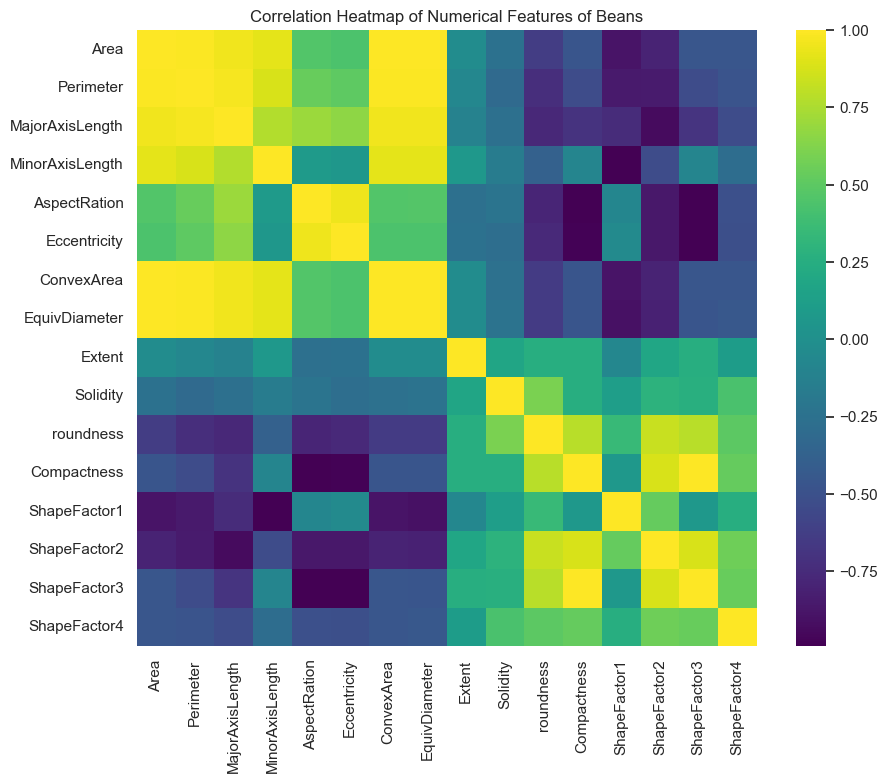

In [23]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features of Beans')
plt.show()

> <b>Insights from the Correlation Heatmap of Numerical Features of Beans:</b>
<ul>
<li>Strong correlations and proportionality exist between the Area, Perimeter, and ConvexArea, indicating the beans’ size. Larger bean areas, perimeter, and convex areas suggest more developed and higher-quality beans.</li>
</ul>

### Calculating the mean absolute correlation for each feature:

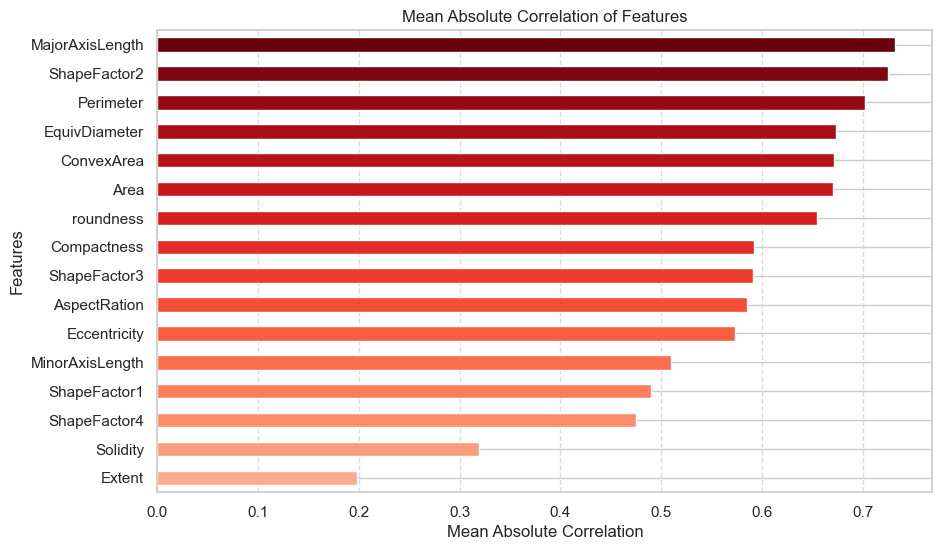

In [26]:
# Calculate the mean absolute correlation for each feature
mean_absolute_correlation = correlation_matrix.abs().mean()

# Sort features based on their mean absolute correlation values in ascending order
mean_absolute_correlation_sorted = mean_absolute_correlation.sort_values(ascending=True)

# Define a color palette for the plot
colors = plt.cm.Reds(np.linspace(0.3, 1, len(mean_absolute_correlation_sorted)))

# Plot the sorted mean absolute correlation values with a gradient color scheme
plt.figure(figsize=(10, 6))
mean_absolute_correlation_sorted.plot(kind='barh', color=colors)
plt.title('Mean Absolute Correlation of Features')
plt.xlabel('Mean Absolute Correlation')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

> <b>Insights from the Mean Absolute Correlation Visualization:</b>
<ul>
    <li> <b>Highly Correlated Features:</b> Features such as MajorAxisLength, ShapeFactor2, Perimeter, EquivDiameter, ConvexArea, and Area display strong positive correlations, suggesting their interconnectedness in describing the size and shape of the beans. These attributes can collectively provide meaningful information about beans’ size and shape characteristics that are crucial for quality assessment. </li>
    <li> <b>Moderately Correlated Features:</b> Features like Roundness, Compactness, ShapeFactor3, AspectRation, and Eccentricity exhibit moderate correlations with other features. The correlations suggest that aspects related to the roundness and compactness of beans contribute to bean quality but not as much as the features associated with the beans’ size and shape. </li>
    <li> <b>Low Correlation Features:</b> MinorAxisLength, ShapeFactor1, ShapeFactor4, Solidity, and Extent show relatively low correlations with other features. Though their influence on bean quality is less strong, these features still offer valuable information that contributes to the assessment of bean quality in terms of structure. </li>

<b>Answering the guide questions:</b>
#### 1. How are the features correlated to each other?
- There is a variety of correlations between the features. Area, Perimeter, and ConvexArea are strongly correlated and proportional with each other, suggesting that the values of these features increase together, potentially indicating higher quality beans.

#### 2. What are the implications of the mean absolute correlation values for assessing bean quality?
- Bean features that have high, moderate, and low correlations were distinguished. By examining the features’ mean absolute correlation values, we can identify which have the strongest and highest overall correlations, enabling them to be prioritized in assessing bean quality.

## Conclusion

The analysis unveils an overall pattern of correlations among the features of beans. Variety in the levels of correlations shows diversity in the correlation patterns of bean features, highlighting essential features to be prioritized in bean quality assessment.

<b> By utilizing these correlations, stakeholders in the bean industry can enhance their quality assessment methodologies, ensuring the distribution of high-quality beans to consumers worldwide.</b>